# Book Ratings Prediction EDA

### Importing Libraries

In [4]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import os
import matplotlib.pyplot as plt
from sklearn.preprocessing import MultiLabelBinarizer, OneHotEncoder
plt.style.use('fast')


### Read in the Data and Basic Exploration

In [5]:
try: 
    books_df = pd.read_csv('books.csv')
except:
    books_df = pd.read_csv('books.csv', on_bad_lines='warn')

b'Skipping line 3350: expected 12 fields, saw 13\nSkipping line 4704: expected 12 fields, saw 13\nSkipping line 5879: expected 12 fields, saw 13\nSkipping line 8981: expected 12 fields, saw 13\n'


We find that there are a few rows where there are more commas than necessary leading to an extra field. There are only 4 of such rows out of 11,127 rows in total or 0.04% so this can be safely ignored. 

In [6]:
books_df.shape

(11123, 12)

In [7]:
books_df.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic


In [8]:
books_df.describe()

,bookID,average_rating,isbn13,num_pages,ratings_count,text_reviews_count
count,11123.000000,11123.000000,1.112300e+04,11123.000000,1.112300e+04,11123.000000
mean,21310.856963,3.934075,9.759880e+12,336.405556,1.794285e+04,542.048099
std,13094.727252,0.350485,4.429758e+11,241.152626,1.124992e+05,2576.619589
min,1.000000,0.000000,8.987060e+09,0.000000,0.000000e+00,0.000000
25%,10277.500000,3.770000,9.780345e+12,192.000000,1.040000e+02,9.000000
50%,20287.000000,3.960000,9.780582e+12,299.000000,7.450000e+02,47.000000
75%,32104.500000,4.140000,9.780872e+12,416.000000,5.000500e+03,238.000000
max,45641.000000,5.000000,9.790008e+12,6576.000000,4.597666e+06,94265.000000


In [9]:
books_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11123 entries, 0 to 11122
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bookID              11123 non-null  int64  
 1   title               11123 non-null  object 
 2   authors             11123 non-null  object 
 3   average_rating      11123 non-null  float64
 4   isbn                11123 non-null  object 
 5   isbn13              11123 non-null  int64  
 6   language_code       11123 non-null  object 
 7     num_pages         11123 non-null  int64  
 8   ratings_count       11123 non-null  int64  
 9   text_reviews_count  11123 non-null  int64  
 10  publication_date    11123 non-null  object 
 11  publisher           11123 non-null  object 
dtypes: float64(1), int64(5), object(6)
memory usage: 1.0+ MB


With this high-level exploration of the dataset, we find that;
1. It contains 11,123 records and 12 variables
2. On the face of it, there's no missng data
3. Not all data is properly represented or represented in its optimal form for analysis and modeling. Hence some transformation is need.

### Data Cleansing Transformations

1. rename "  num_pages" to "num_pages" for easy referencing
2. Convert the `isbn13` and `bookID` to object type
3. Convert `publication_date` to datetime type
4. Split authors on "/"


In [10]:
#remove leading spaces in front of num_paages
books_df.rename(columns={"  num_pages":"num_pages"}, inplace=True)

#Convert publication date to date object
books_df['publication_date'] = pd.to_datetime(books_df['publication_date'], format = "%m/%d/%Y", errors='coerce')

#convert isbn_13 to type object
books_df['isbn13'] =books_df['isbn13'].astype('object')

#convert book_id to type object
books_df['bookID'] = books_df['bookID'].astype('object')

# Split the authors column into a list of individual author names
books_df['authors'] = books_df['authors'].str.split('/')

# Create count of authors for each book
books_df['author_count'] = books_df['authors'].map(lambda a: len(a))


# Title Word Count
books_df['title_word_count'] = (books_df['title'].str.split(" ")).map(lambda w: len(w))

In [12]:
books_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11123 entries, 0 to 11122
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   bookID              11123 non-null  object        
 1   title               11123 non-null  object        
 2   authors             11123 non-null  object        
 3   average_rating      11123 non-null  float64       
 4   isbn                11123 non-null  object        
 5   isbn13              11123 non-null  object        
 6   language_code       11123 non-null  object        
 7   num_pages           11123 non-null  int64         
 8   ratings_count       11123 non-null  int64         
 9   text_reviews_count  11123 non-null  int64         
 10  publication_date    11121 non-null  datetime64[ns]
 11  publisher           11123 non-null  object        
 12  author_count        11123 non-null  int64         
 13  title_word_count    11123 non-null  int64     

In [13]:
books_df.isna().sum()

bookID                0
title                 0
authors               0
average_rating        0
isbn                  0
isbn13                0
language_code         0
num_pages             0
ratings_count         0
text_reviews_count    0
publication_date      2
publisher             0
author_count          0
title_word_count      0
dtype: int64

The data is in much better shape now. However, there are 2 publication dates where the date in string format could not be converted to a date object resulting in NAs. We can safely ingnore these 2 cases

In [14]:
books_df = books_df.loc[~books_df.publication_date.isna()]

#### Distribution of Average Rating

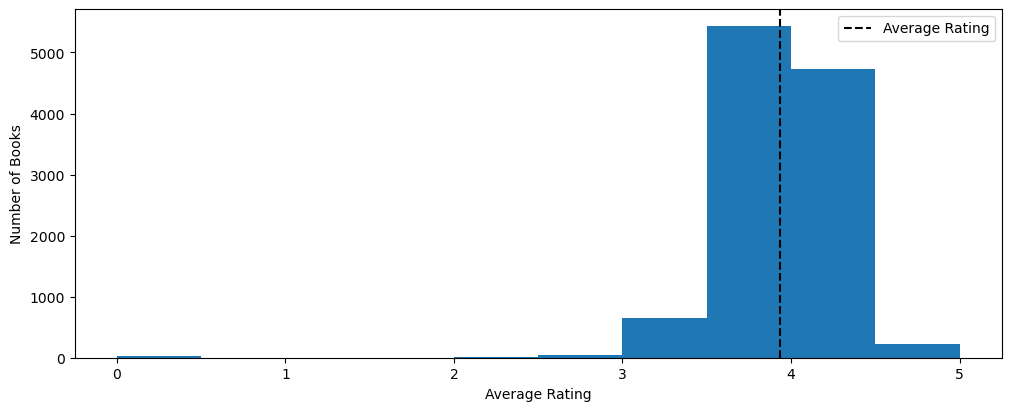

In [15]:
fig = plt.figure(constrained_layout=True, figsize = (10,4))
plt.hist(books_df['average_rating'])
plt.xlabel('Average Rating')
plt.ylabel('Number of Books')
plt.axvline(x = books_df['average_rating'].mean(), color='black', linestyle='--', linewidth=1.5, label='Average Rating')
plt.legend()
plt.show()

In [16]:
print("The average rating observed in the dataset is {}".format(books_df['average_rating'].mean()))

The average rating observed in the dataset is 3.934058088301385


We observe an average rating of 3.934 with a distribution skewed to the left. 

#### Relationship Between Average Rating and Number of Pages

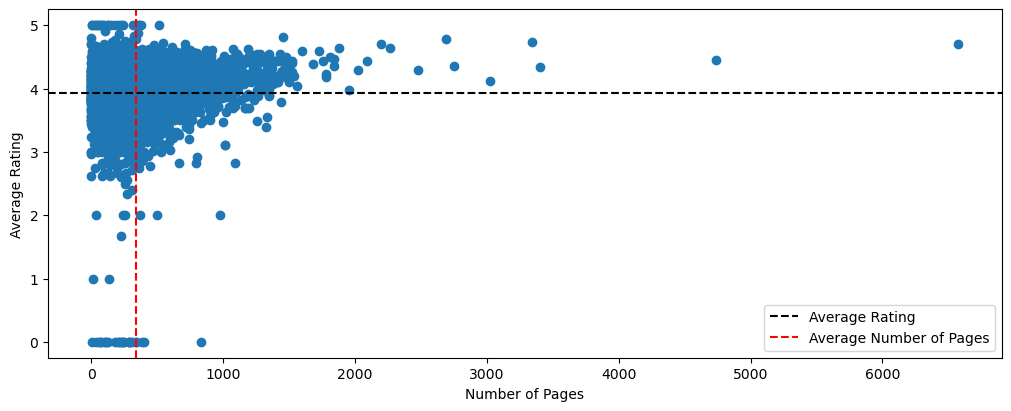

In [17]:
fig = plt.figure(constrained_layout=True, figsize = (10,4))
plt.scatter(books_df['num_pages'], books_df['average_rating'])
plt.xlabel('Number of Pages')
plt.ylabel('Average Rating')
plt.axhline(y = books_df['average_rating'].mean(), linestyle='--', linewidth=1.5, color='black', label = "Average Rating" )
plt.axvline(x = books_df['num_pages'].mean(), linestyle='--', linewidth= 1.5, color='red', label= "Average Number of Pages")
plt.legend()
plt.show()

In [18]:
print("The average number of pages is {}".format(books_df['num_pages'].mean()))

The average number of pages is 336.343943889938


From the scatter plot, we observe that only books shorter than about 700 pages have an average rating of five stars. Also as the number of pages of a book increases, the average rating increases. At about 1600 pages, all books have an average rating of at leat 4.

Taking a look at the distribution of pages below, we find a right skewed distribution. This is expected as the there's no upper bound on the number of pages a book can have.

#### Distribution of Book Length

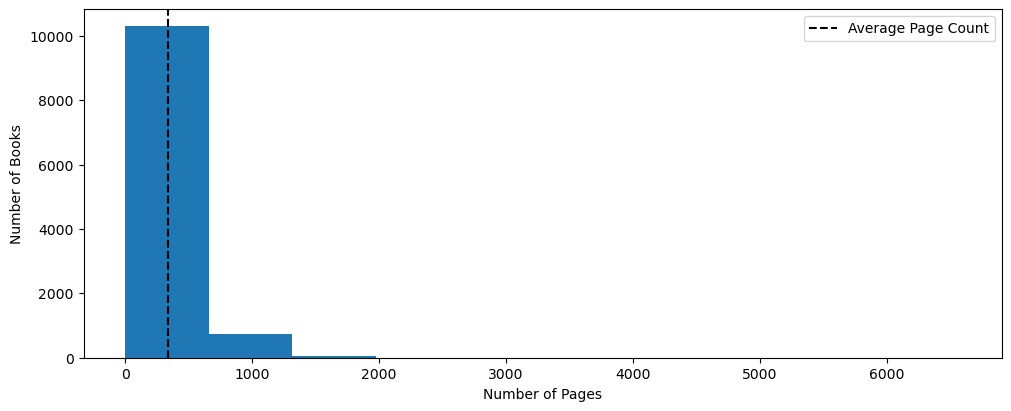

In [19]:
fig = plt.figure(constrained_layout=True, figsize = (10,4))
plt.hist(books_df['num_pages'])
plt.xlabel('Number of Pages')
plt.ylabel('Number of Books')
plt.axvline(x = books_df['num_pages'].mean(), color='black', linestyle='--', linewidth=1.5, label='Average Page Count')
plt.legend()
plt.show()

#### Relationship between Average Ratings and Number of Ratings and Text Based Ratings Count

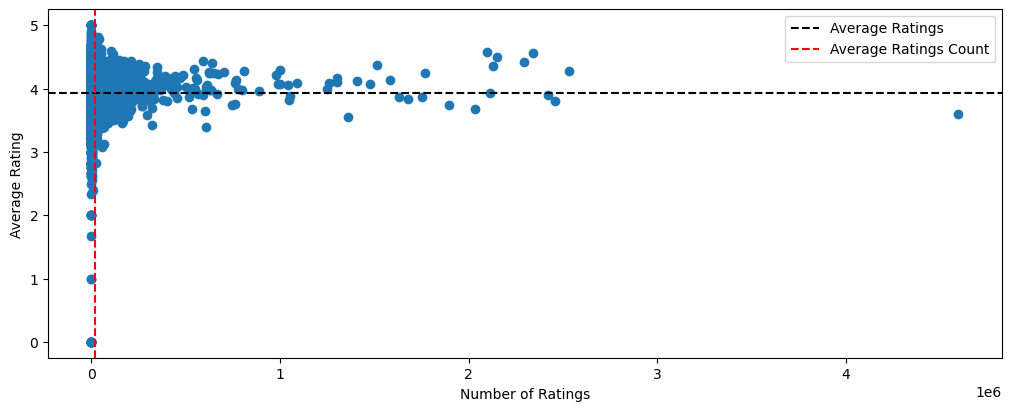

In [20]:
# Examine the relationship between number of ratings and average rating
fig = plt.figure(constrained_layout=True, figsize= (10,4))
plt.scatter(books_df['ratings_count'], books_df['average_rating'])
plt.xlabel('Number of Ratings')
plt.ylabel('Average Rating')
plt.axhline(y = books_df['average_rating'].mean(), linestyle='--', linewidth=1.5, color='black', label = "Average Ratings" )
plt.axvline(x = books_df['ratings_count'].mean(), linestyle = '--', linewidth= 1.5, color = 'red', label="Average Ratings Count")
plt.legend()
plt.show()

In [21]:
print("The average ratings count is {}".format(books_df['ratings_count'].mean()))

The average ratings count is 17945.119683481702


From the above chart, we find that only books that have few ratings have low average ratings. There are a handful of books 
Peering down into the distribution of the ratings count below, we observe that the ratings count distribution is sharply skewed to the right. As expected this indicates that there are critically acclaimed books that received a very high number of ratings, alongside books with few ratings. Such books are read by a wide with varying opinions on the rating of the book, hence no extreme average ratings.

In [22]:
books_df['ratings_count'].describe()

count    1.112100e+04
mean     1.794512e+04
std      1.125091e+05
min      0.000000e+00
25%      1.040000e+02
50%      7.450000e+02
75%      4.996000e+03
max      4.597666e+06
Name: ratings_count, dtype: float64

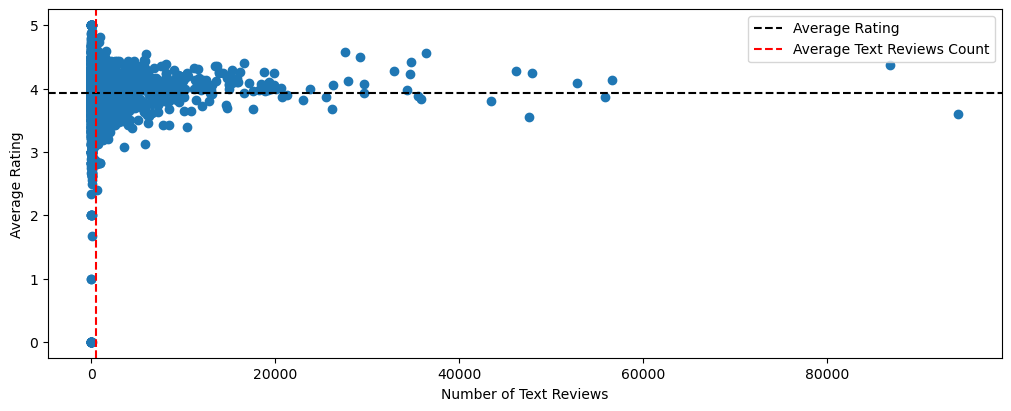

In [23]:
fig = plt.figure(constrained_layout=True, figsize = (10,4))
plt.scatter(books_df['text_reviews_count'], books_df['average_rating'])
plt.xlabel('Number of Text Reviews')
plt.ylabel('Average Rating')
plt.axhline(y = books_df['average_rating'].mean(), linestyle='--', linewidth=1.5, color='black', label = "Average Rating" )
plt.axvline(x = books_df['text_reviews_count'].mean(), linestyle='--', linewidth=1.5, color = 'red', label= "Average Text Reviews Count")
plt.legend()
plt.show()

The relationship between the average ratings and number of text reviews appears similar to that between the average ratings and the number of ratings. It's worth diving deeper to understand the relationship between count of text reveiws and count of reviews.

#### Relationships Between Average Rating and Publication Date

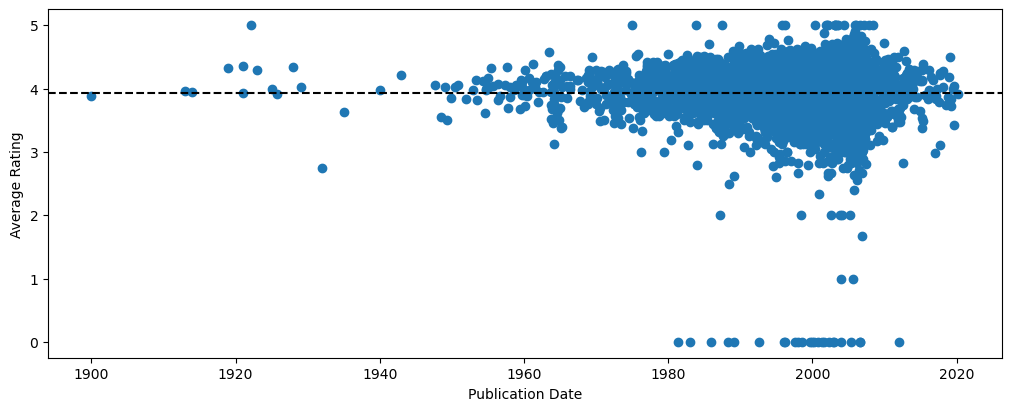

In [24]:
fig = plt.figure(constrained_layout=True, figsize = (10,4))
plt.scatter(books_df['publication_date'], books_df['average_rating'], )
plt.xlabel('Publication Date')
plt.ylabel('Average Rating')
plt.axhline(y = books_df['average_rating'].mean(), linestyle='--', linewidth=1.5, color='black' )
plt.show()


From the above chart, we can establish that most books in the dataset were published recently, with more than 70% being within the last 20 years (2000 - 2020). We also find that most ratings below 2 stars were between 1980 and 2015. 

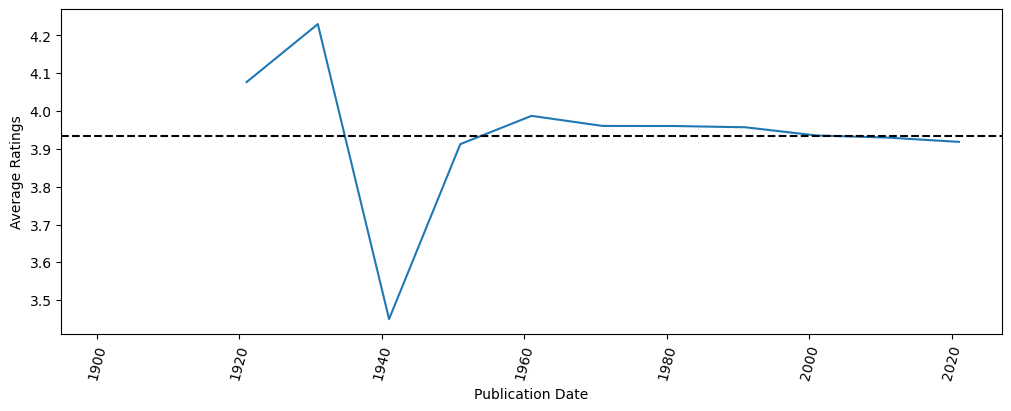

In [25]:
fig = plt.figure(constrained_layout=True, figsize = (10,4))
data = pd.DataFrame(books_df.resample('10Y', on='publication_date').average_rating.mean())
plt.plot(data.index, data.average_rating )
plt.xlabel('Publication Date')
plt.ylabel('Average Ratings')
plt.tick_params('x',labelrotation=75)
plt.axhline(y = data.average_rating.mean(), linestyle='--', linewidth=1.5, color='black' )
plt.show()



Taking the average rating over 10 year periods, it appears that ratings shows some variation with the publication date at a general level. 

#### Relationships Ratings Count and Publication Date

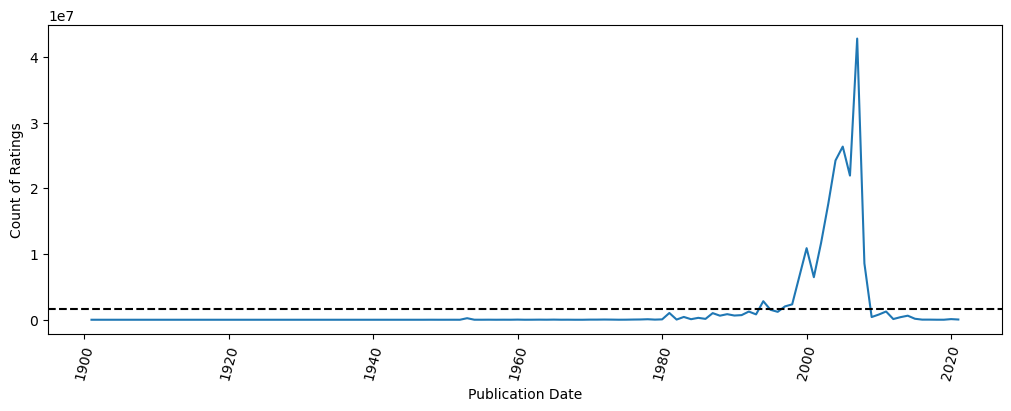

In [26]:
fig = plt.figure(constrained_layout=True, figsize = (10,4))
data = pd.DataFrame(books_df.resample('1Y', on='publication_date').ratings_count.sum())
plt.plot(data.index, data.ratings_count )
plt.xlabel('Publication Date')
plt.ylabel('Count of Ratings')
plt.tick_params('x',labelrotation=75)
plt.axhline(y = data.ratings_count.mean(), linestyle='--', linewidth=1.5, color='black' )
plt.show()



From the late 90s to the late 2000s, it is apparent that there are block-buster titles that generated a high number of ratings. Though this may have little to do with the ratings, peering down into what these titles from 2000 to 2010 may reveal some interesting insights

In [27]:
books_2000s = books_df.loc[ (books_df.publication_date > datetime(1999,12,31)) & (books_df.publication_date < datetime(2011,1,1))]
books_2000s.loc[:,["publication_date","title", "ratings_count","average_rating"]].sort_values(by=['ratings_count'], ascending=False).head(20)

,publication_date,title,ratings_count,average_rating
10336,2006-09-06,Twilight (Twilight #1),4597666,3.59
1697,2002-08-15,The Hobbit or There and Back Again,2530894,4.27
1462,2001-01-30,The Catcher in the Rye,2457092,3.80
307,2006-04-01,Angels & Demons (Robert Langdon #1),2418736,3.89
3,2004-05-01,Harry Potter and the Prisoner of Azkaban (Harr...,2339585,4.56
1,2004-09-01,Harry Potter and the Order of the Phoenix (Har...,2153167,4.49
23,2003-09-05,The Fellowship of the Ring (The Lord of the Ri...,2128944,4.36
2114,2003-05-06,Animal Farm,2111750,3.93
0,2006-09-16,Harry Potter and the Half-Blood Prince (Harry ...,2095690,4.57
5015,2004-01-01,Romeo and Juliet,1893917,3.74


In [28]:
print("{} or {}% of all books in the dataset was published in the 2000s".format(len(books_2000s), len(books_2000s)*100/len(books_df)))

7593 or 68.27623415160507% of all books in the dataset was published in the 2000s


While we can confirm that blockbuster titles were indeed reposnsible for the high ratings count as opposed to artifcats in the data, we can also infer two things from the fact that 68% of all books in the dataset were published in the 2000s;
1. Goodreads was established in 2006, and these ratings were collected over the internet. This means that mostly current books were read and rated. 
2. Secondly, some books trended for a long period, and had more opportunity to be rated than more recently published books.

#### Relationship Between Average Rating and Language Code

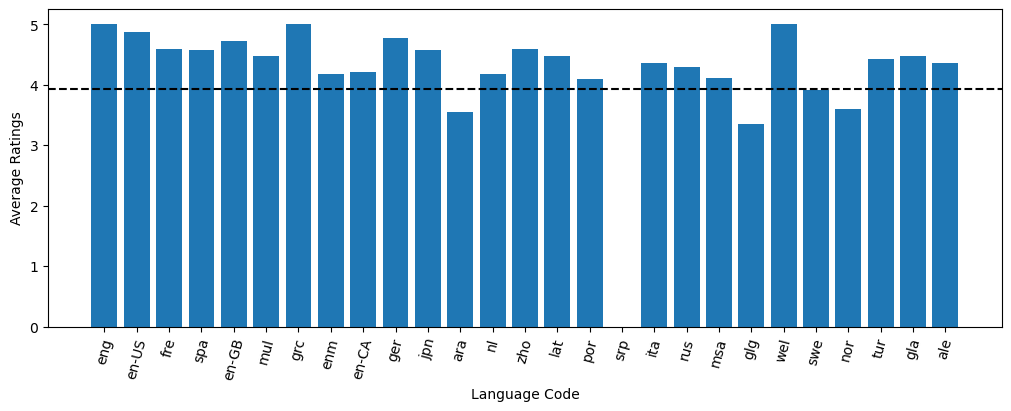

In [29]:
fig = plt.figure(constrained_layout=True, figsize = (10,4))
plt.bar(books_df['language_code'], books_df['average_rating'] )
plt.xlabel('Language Code')
plt.ylabel('Average Ratings')
plt.tick_params('x',labelrotation=75)
plt.axhline(y = books_df['average_rating'].mean(), linestyle='--', linewidth=1.5, color='black' )
plt.show()


The language code appears to be a good predictive factor in determining the rating of a book.

#### Relationship Between Average Rating and Title Word Count

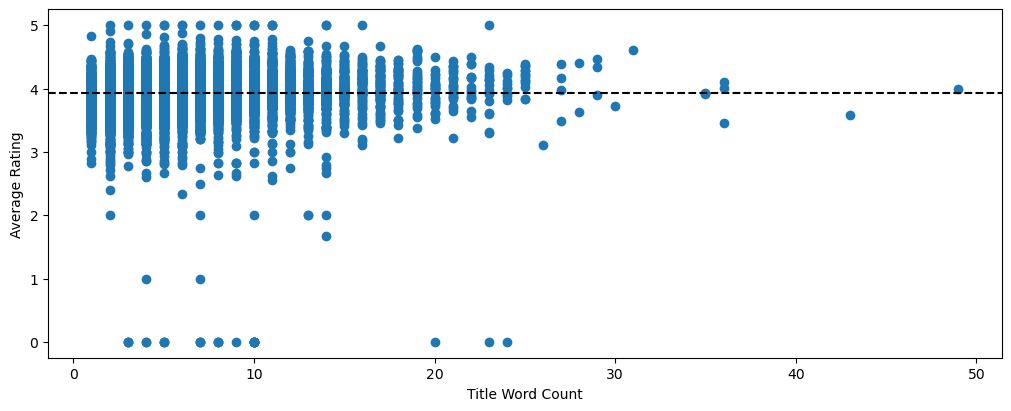

In [37]:
fig = plt.figure(constrained_layout=True, figsize = (10,4))
plt.scatter(books_df['title_word_count'], books_df['average_rating'], )
plt.xlabel('Title Word Count')
plt.ylabel('Average Rating')
plt.axhline(y = books_df['average_rating'].mean(), linestyle='--', linewidth=1.5, color='black' )
plt.show()


We observe that the titleword count to an extenent may be helpful in predicting the rating of a book.

#### Relationship Between Average Rating and Author Count

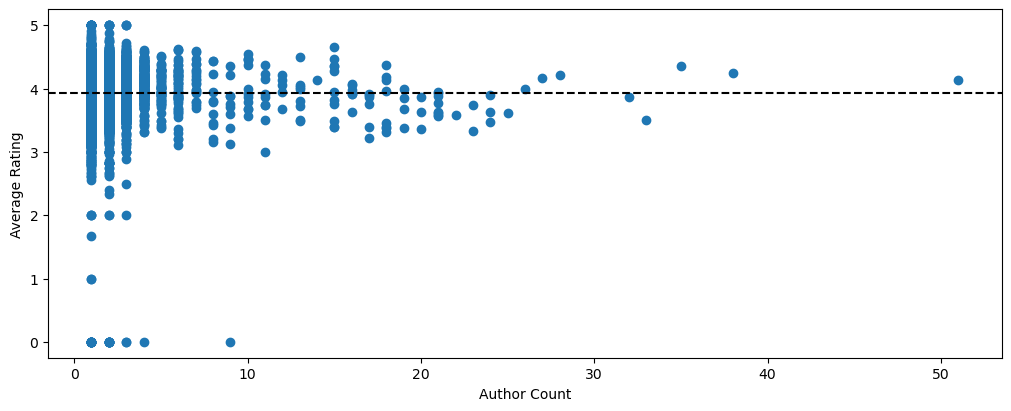

In [38]:
fig = plt.figure(constrained_layout=True, figsize = (10,4))
plt.scatter(books_df['author_count'], books_df['average_rating'], )
plt.xlabel('Author Count')
plt.ylabel('Average Rating')
plt.axhline(y = books_df['average_rating'].mean(), linestyle='--', linewidth=1.5, color='black' )
plt.show()


Again we notice that author count to an extent is useful in categorizing the average rating.

### EDA Key Take Aways

1. The Average Ratings have a left-skewed distribution with an average of 3.93
</br></br>
2. Book pages have a right-skewed distribution, and as books have more pages, bad reviews reduce. Also, only books shorter than about 700 pages have an average rating of five stars, and at about 1600 pages, all books have an average rating of at leat 4.
</br></br>
3. Books with few ratings show higher variation about the mean than books that have a high ratings count(whether ratings or text reviews)
</br></br>
4. From the 1960s to the 2000s, it appears ratings average ratings over a 10-year period are on the decline.
</br></br>
5. Language code looks like a reasonably strong factor in predicitng the rating of a book.

In [35]:
books_df.loc[books_df.num_pages > 3000]

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,author_count,title_word_count
6,10,Harry Potter Collection (Harry Potter #1-6),[J.K. Rowling],4.73,0439827604,9780439827607,eng,3342,28242,808,2005-09-12,Scholastic,1,7
6497,24520,The Complete Aubrey/Maturin Novels (5 Volumes),[Patrick O'Brian],4.70,039306011X,9780393060119,eng,6576,1338,81,2004-10-17,W. W. Norton Company,1,6
6802,25587,The Second World War,"[Winston S. Churchill, John Keegan]",4.45,039541685X,9780395416853,eng,4736,1493,99,1986-05-09,Mariner Books,2,4
6822,25709,Summa Theologica 5 Vols,[Thomas Aquinas],4.12,0870610635,9780870610639,eng,3020,2734,84,1981-01-01,Christian Classics,1,5
10906,44613,Remembrance of Things Past (Boxed Set),"[Marcel Proust, C.K. Scott Moncrieff, Frederic...",4.34,0701125594,9780701125592,eng,3400,6,1,1981-03-05,Chatto & Windus,4,6
